MAE: 85468.57883333333
RMSE: 104750.8692051948
R square: 0.9382462498601608


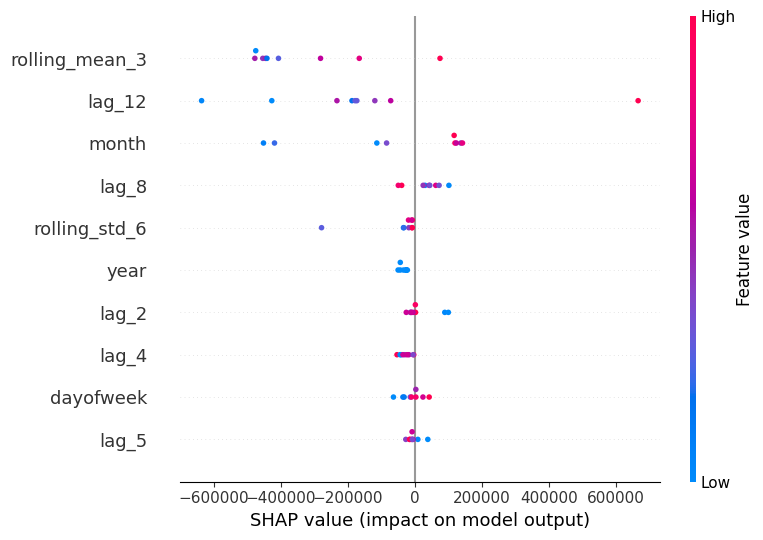

In [ ]:
import pandas as pd
import numpy as np
import shap
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv(r"dataset\data_in_million.csv")
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Feature Engineering
data['month'] = data.index.month
data['year'] = data.index.year
data['dayofweek'] = data.index.dayofweek
data['lag_2'] = data['sales'].shift(2)
data['lag_4'] = data['sales'].shift(4)
data['lag_5'] = data['sales'].shift(5)
# data['lag_6'] = data['sales'].shift(6)
data['lag_8'] = data['sales'].shift(8) 
data['lag_12'] = data['sales'].shift(12)


data['rolling_mean_3'] = data['sales'].rolling(window=3).mean()
data['rolling_std_6'] = data['sales'].rolling(window=6).std()
data.dropna(inplace=True)

# Train-Test Split
X = data.drop(columns=['sales'])
y = data['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)

# Evaluate Model
y_pred = xgb_model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R square: {r2_score(y_test,y_pred)}")

# SHAP for Explainability
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test)


In [33]:
data = pd.read_csv(r"dataset\data_in_million.csv")
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)


In [13]:
X_train.index

DatetimeIndex(['2078-04-01', '2078-05-01', '2078-06-01', '2078-07-01',
               '2078-08-01', '2078-09-01', '2078-10-01', '2078-11-01',
               '2078-12-01', '2079-01-01', '2079-02-01', '2079-03-01',
               '2079-04-01', '2079-05-01', '2079-06-01', '2079-07-01',
               '2079-08-01', '2079-09-01', '2079-10-01', '2079-11-01',
               '2079-12-01'],
              dtype='datetime64[ns]', name='date', freq=None)

In [14]:
X_test.index

DatetimeIndex(['2080-01-01', '2080-02-01', '2080-03-01', '2080-04-01',
               '2080-05-01', '2080-06-01', '2080-07-01', '2080-08-01',
               '2080-09-01', '2080-10-01', '2080-11-01', '2080-12-01',
               '2081-01-01', '2081-02-01', '2081-03-01', '2081-04-01',
               '2081-05-01', '2081-06-01', '2081-07-01', '2081-08-01',
               '2081-09-01', '2081-10-01'],
              dtype='datetime64[ns]', name='date', freq=None)

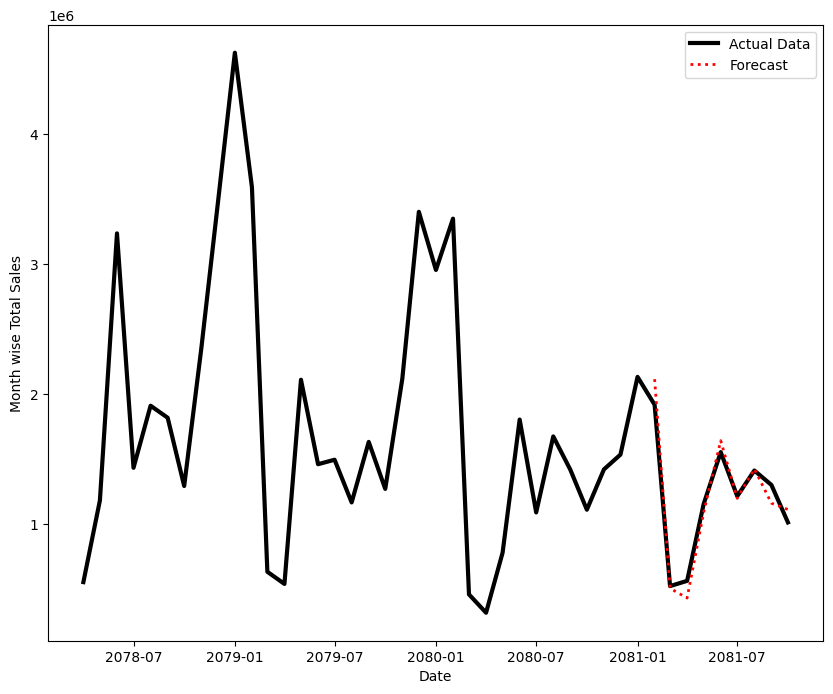

In [31]:
plt.figure(figsize=(10,8))
plt.plot(data.index, data["sales"], label="Actual Data", color="black", linestyle="solid", linewidth=3)
plt.plot(X_test.index, y_pred, label="Forecast", color="red",linestyle="dotted", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Month wise Total Sales")
plt.legend()
plt.show()


In [ ]:
# explainable AI using SHAP
explain=shap.Explainer(xgb_model)
shap_values=explainer(X_test)
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
print(shap_df.head(5))

In [ ]:
len(X_test)

In [ ]:
explain=shap.Explainer(xgb_model)
shap_values=explainer(X_test)

shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
print(shap_df.head(5))
shap_df.to_csv("Saved_to_csv.csv")

In [ ]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)

print(shap_df.head(10))

shap_df.to_csv("shap_values.csv", index=False)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.0s finished


Random Forest MAE: 256006.58
Random Forest RMSE: 297502.97


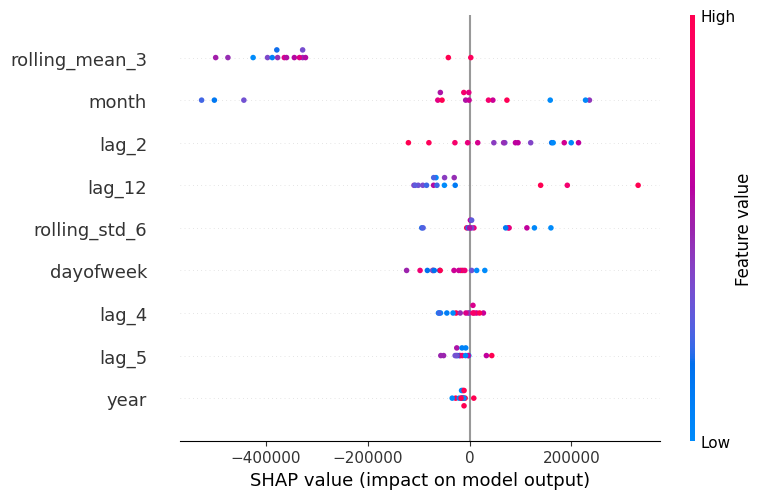

In [ ]:
#### Random Forest

import pandas as pd
import numpy as np
import shap
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv(r"dataset\data_without_query_from_2074-2081_in million.csv")
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Feature Engineering
data['month'] = data.index.month
data['year'] = data.index.year
data['dayofweek'] = data.index.dayofweek
data['lag_2'] = data['sales'].shift(2)
data['lag_4'] = data['sales'].shift(4)
data['lag_5'] = data['sales'].shift(5)
# data['lag_6'] = data['sales'].shift(6)
# data['lag_8'] = data['sales'].shift(8) 
data['lag_12'] = data['sales'].shift(12)


data['lag_12'] = data['sales'].shift(12)
data['rolling_mean_3'] = data['sales'].rolling(window=3).mean()
data['rolling_std_6'] = data['sales'].rolling(window=6).std()
data.dropna(inplace=True)

# Train-Test Split
X = data.drop(columns=['sales'])
y = data['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning
param_grid = {
    "n_estimators": [500, 1000, 1500],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]

}

#Hyperparameter Tuning and cross-validation using Grid Search Technique
rf = RandomForestRegressor(random_state=42, n_jobs=-1, verbose=True)
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

rf=RandomForestRegressor(random_state=42,n_jobs=-1,verbose=True)
#
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Random Forest Metrics
mae_rf = mean_absolute_error(y_test, y_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")

# Apply SHAP for Explainability
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test)
